In [1]:
import polars as pl
import plotly.express as px
import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sub1 = "/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Gaby/Data Analysis/ActiveAvoidance/Core_guppy_postcross/core_data/compiled_timeseries_data/cage_150_mouse_672_day_1_compiled_timeseries_data.parquet"
sub2 = "/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Gaby/Data Analysis/ActiveAvoidance/Core_guppy_postcross/core_data/compiled_timeseries_data/cage_150_mouse_672_day_4_compiled_timeseries_data.parquet"
sub3 = "/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Gaby/Data Analysis/ActiveAvoidance/Core_guppy_postcross/core_data/compiled_timeseries_data/cage_150_mouse_672_day_7_compiled_timeseries_data.parquet"

df1 = pl.read_parquet(sub1)[:200000]
df2 = pl.read_parquet(sub2)[:200000]
df3 = pl.read_parquet(sub3)[:200000]

In [29]:
def plot_da(df, ax, day, group):
    sns.lineplot(data = df,y = df['z_score_DA'], x =df['time'], ax=ax, size = 0.1, color = 'black', legend=False)
    sns.lineplot(data = df,y = (df['CueB_encoded']*3)-5, x =df['time'], ax=ax, color = 'blue', size = .1, legend = False)
    sns.lineplot(data = df,y = (df['ShkB_encoded']*3)-5, x =df['time'], ax=ax, color = 'red', size = 0.1, legend = False)
    sns.lineplot(data = df,y = (df['EspB_encoded']*3)-5, x =df['time'], ax=ax, color = 'orange', size = 0.1, legend = False)
    sns.lineplot(data = df,y = (df['AvdB_encoded']*3)-5, x =df['time'], ax=ax, color = 'green', size = 0.1, legend = False)
    ax.set_title(f'Day: {day} , Performance {group}')
    ax.set_ylabel('Dopamine (z-score)')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.text(0, 13, "Dopamine", color = 'k')
    ax.text(0, 12, 'Cue', color = 'b')
    ax.text(0, 11, 'Shock', color = 'red')
    ax.text(0, 10, 'Escape', color = 'orange')
    ax.text(0, 9, 'Avoid', color = 'green')
    plt.xticks([])
    plt.yticks([])
    sns.despine(top=True, bottom=True, left=True, right=True) 

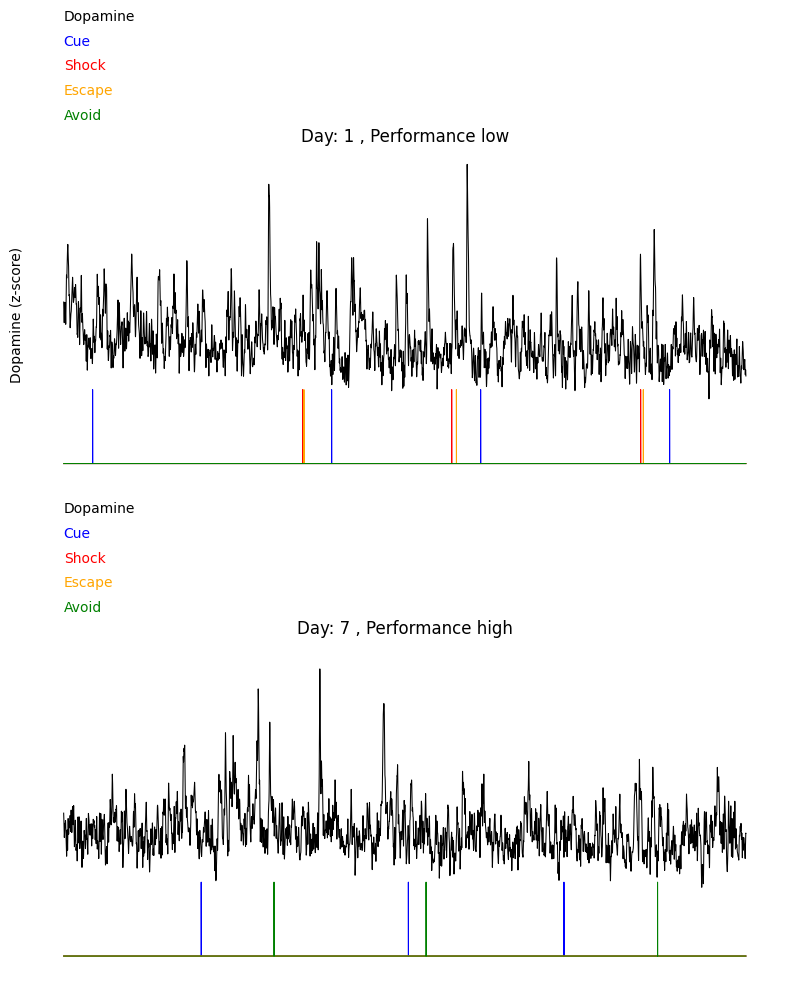

In [31]:
layout = """AAA
BBB
"""
fig, axs = plt.subplot_mosaic(mosaic=layout, figsize = (8,10), sharex= True, sharey= True)
plot_da(df = df1, ax = axs['A'], day = 1, group = 'low')
plot_da(df3, ax = axs['B'], day = 7, group= 'high')


plt.tight_layout()


# Goal
* use unsupervised learning to identify dopamine motifs or patterns associated with learning and the differnt events that occur
* Can we extract patterns accross training days asscoiated with various events (eg cue) that we cant use standard analysis for?
  

### Can we manipulate the models latent space? 
1. train Encoder/Decoder
    CNN doesn't work well with the binary timestamps of 0, 1
2. pass in test set with "empty" vectors except the vector of interest and decompose the signal?
